<a href="https://colab.research.google.com/github/virajpvs/Computer_Vision_R-D/blob/main/yolov7_for_custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
import pandas as pd
import time
import cv2
import torch
import matplotlib.pyplot as plt
import numpy as np

import torch.nn.functional as F
from torch import nn
import torchvision

from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from numpy import random
from pathlib import Path

In [20]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# train_dataset_path = "/content/drive/MyDrive/Colab_Notebooks/construction_dataset_model_project/data/train/images"
# test_dataset_path = "/content/drive/MyDrive/Colab_Notebooks/construction_dataset_model_project/data/test/images"

train_dataset_path = "/content/drive/MyDrive/Colab_Notebooks/construction_dataset_model_project/data/train"
test_dataset_path = "/content/drive/MyDrive/Colab_Notebooks/construction_dataset_model_project/data/test"
valid_dataset_path = "/content/drive/MyDrive/Colab_Notebooks/construction_dataset_model_project/data/valid"

In [23]:
''' data
    ├── train
    │   ├── images
    │   └── labels
    ├── test
    │   ├── images
    │   └── labels
    ├── valid
    │   ├── images
    │   └── labels'''

' data\n    ├── train\n    │   ├── images\n    │   └── labels\n    ├── test\n    │   ├── images\n    │   └── labels\n    ├── valid\n    │   ├── images\n    │   └── labels'

In [24]:
# appling tranforms on datasets

train_transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor()
])

In [25]:
# ImageFolder use images with classifed lables
# train_dataset = torchvision.datasets.ImageFolder(root= train_dataset_path, transform = train_transform)
# test_dataset = torchvision.datasets.ImageFolder(root= test_dataset_path, transform = test_transform)

# train_dataset = torchvision.datasets.DatasetFolder(root= train_dataset_path, transform = train_transform)
# test_dataset = torchvision.datasets.DatasetFolder(root= test_dataset_path, transform = test_transform)

In [26]:
class CustomDataset(Dataset):
    def __init__(self, dataset_path, transform=None):
        self.dataset_path = dataset_path
        self.transform = transform

        # Collect all image file names into a list
        self.image_files = [f for f in os.listdir(os.path.join(dataset_path, 'images')) if f.endswith('.jpg') or f.endswith('.png')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx): # used to load the data
        img_name = os.path.join(self.dataset_path, 'images', self.image_files[idx])
        label_name = os.path.join(self.dataset_path, 'labels', self.image_files[idx].replace('.jpg', '.txt').replace('.png', '.txt'))

        try:
            # Load image and convert into a RGB copy
            image = Image.open(img_name).convert('RGB')

            # Load labels
            with open(label_name, 'r') as file:
                # Parse YOLO format annotations
                label = [list(map(float, line.strip().split())) for line in file.readlines()]

            if self.transform:
                image = self.transform(image)

            return image, label

        except Exception as e:
            print(f"Error loading sample {idx}: {e}")
            return None


In [27]:
# use traing set as dataset_path
train_dataset_path = '/content/drive/MyDrive/Colab_Notebooks/construction_dataset_model_project/data/train'
train_dataset = CustomDataset(train_dataset_path, transform= train_transform)

In [28]:
print(train_dataset)
print(type(train_dataset))
print(f"number of images : {train_dataset.__len__()}")

<class '__main__.CustomDataset'>
number of images : 520


In [29]:
# train_dataset.dataset_path
train_dataset.image_files[:5]

['youtube-246_jpg.rf.5e299b387f6c1b1b00eba9cae2f4958e.jpg',
 'youtube-519_jpg.rf.d2f605362d63e6c778913484dfdfeae8.jpg',
 'image_818_jpg.rf.5927e1e66744164d66eba2a6a8fc84fb.jpg',
 'youtube-824_jpg.rf.5baf65abebe0647f6f8b6ccaa801d7ef.jpg',
 '01235_jpg.rf.59fcb6453e1d0276d34879343c972161.jpg']

In [30]:
train_dataset.transform


Compose(
    Resize(size=(640, 640), interpolation=bilinear, max_size=None, antialias=warn)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
)

In [31]:
for images, labels in train_dataset:
  print(images,labels)
  print(type(images),type(labels))
  break

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]) [[8.0, 0.686328125, 0.06666666666666667, 0.06015625, 0.13333333333333333]]
<class 'torch.Tensor'> <class 'list'>


In [79]:
def dynamic_length_collate(batch):
    #  maximum height of the images in batch
    max_height = max(item[0].shape[1] for item in batch)

    # lists to store padded images and labels
    batch_x = []
    batch_y = []

    for item in batch:
        image, label = item

        # Pad the image if needed to have the same height
        pad_image = F.pad(image, (0, 0, 0, max_height - image.shape[1]))

        # Append padded image and labels
        batch_x.append(pad_image)
        batch_y.append(label)

    # Return tuple of padded images and labels
    return torch.stack(batch_x), batch_y


###Apply Dataloader

In [94]:
# Dataloaders for train and test sets
batch_size = 8
train_dataloader = DataLoader(train_dataset,
                              batch_size = batch_size,
                              shuffle=True ,
                              drop_last = True,
                              collate_fn = dynamic_length_collate)
# test_loader = DataLoader(test_dataset, batch_size= 4,shuffle= False)

In [95]:
print(train_dataloader)
print(type(train_dataloader))
print(f"lenght of train_dataloader {len(train_dataloader)}")

<class 'torch.utils.data.dataloader.DataLoader'>
lenght of train_dataloader 65


###Visualising

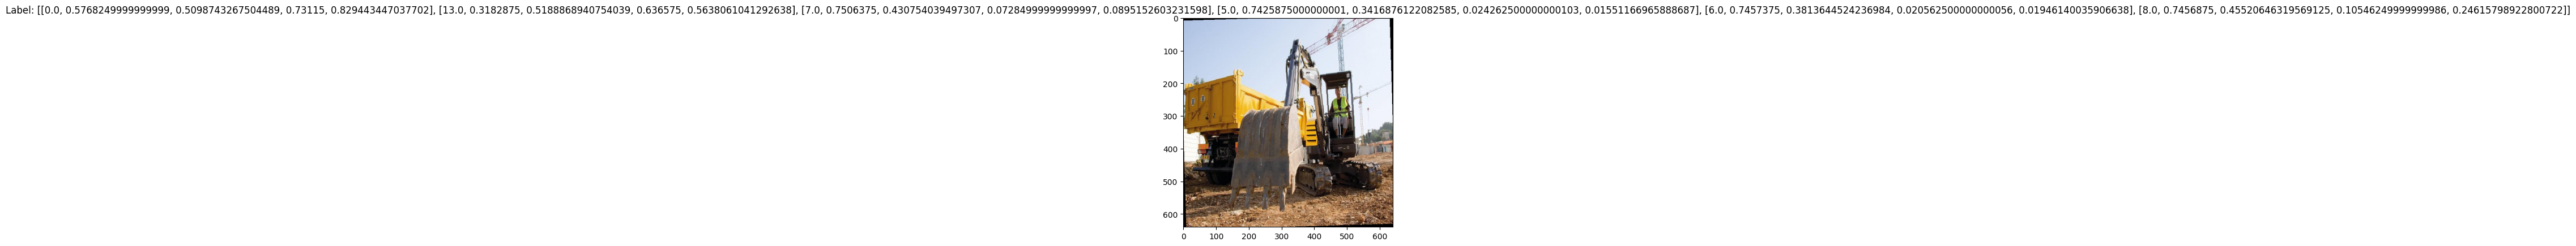

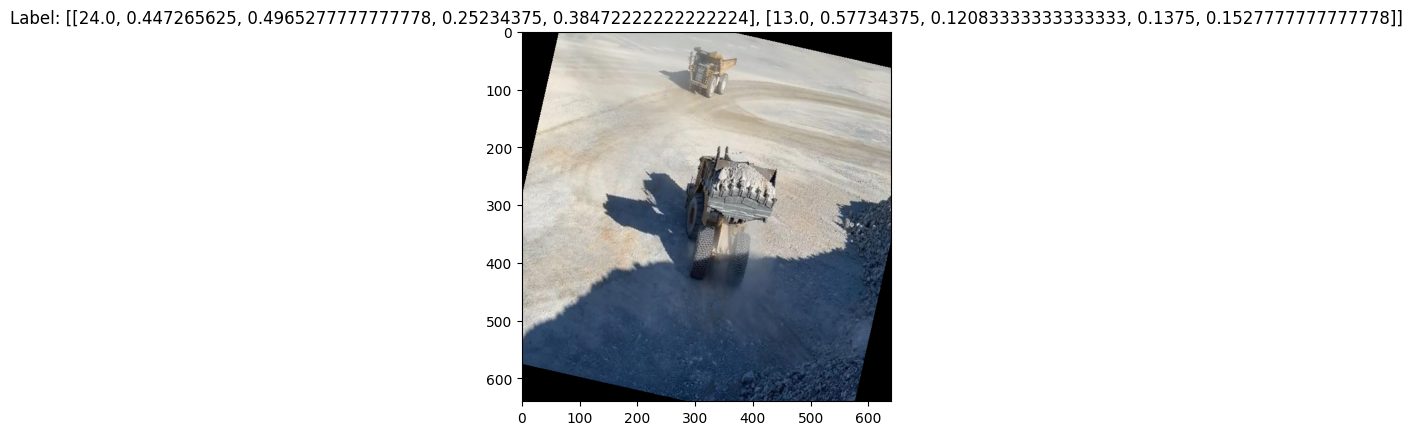

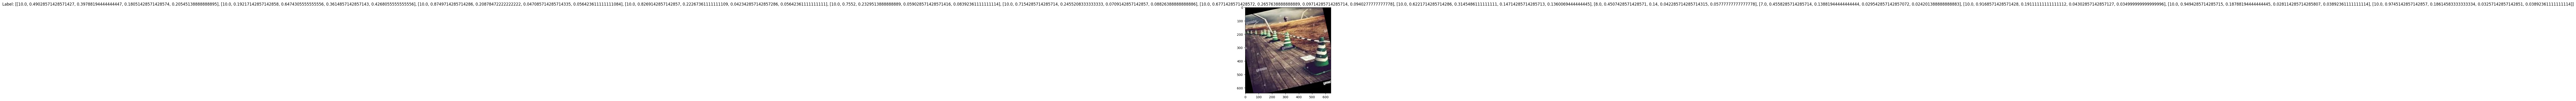

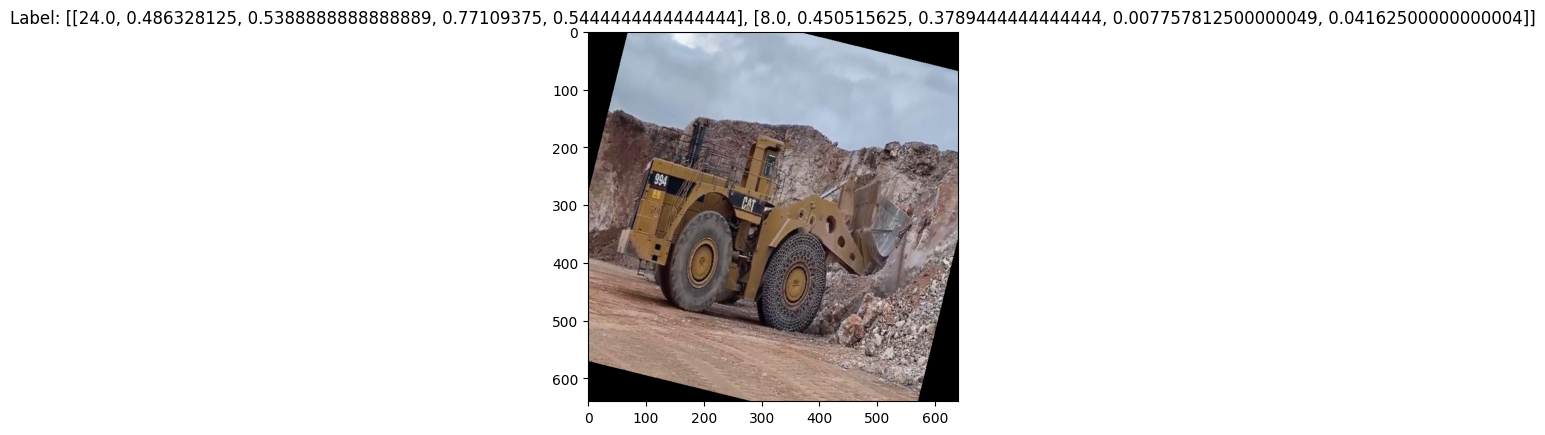

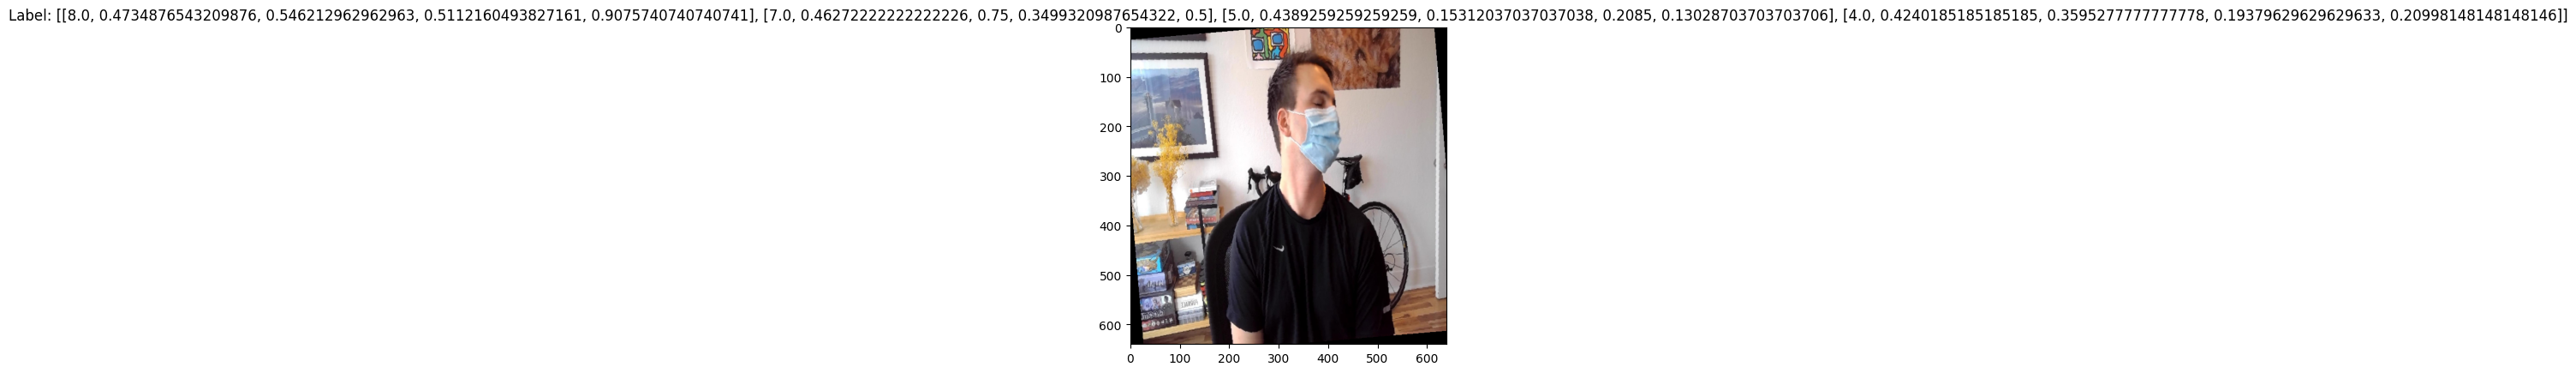

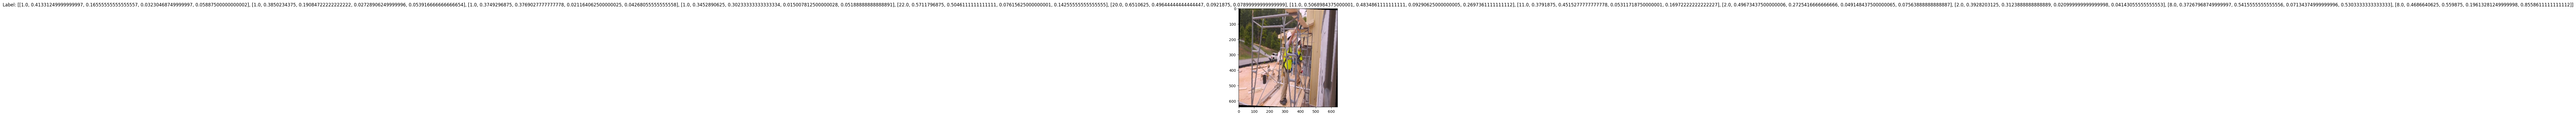

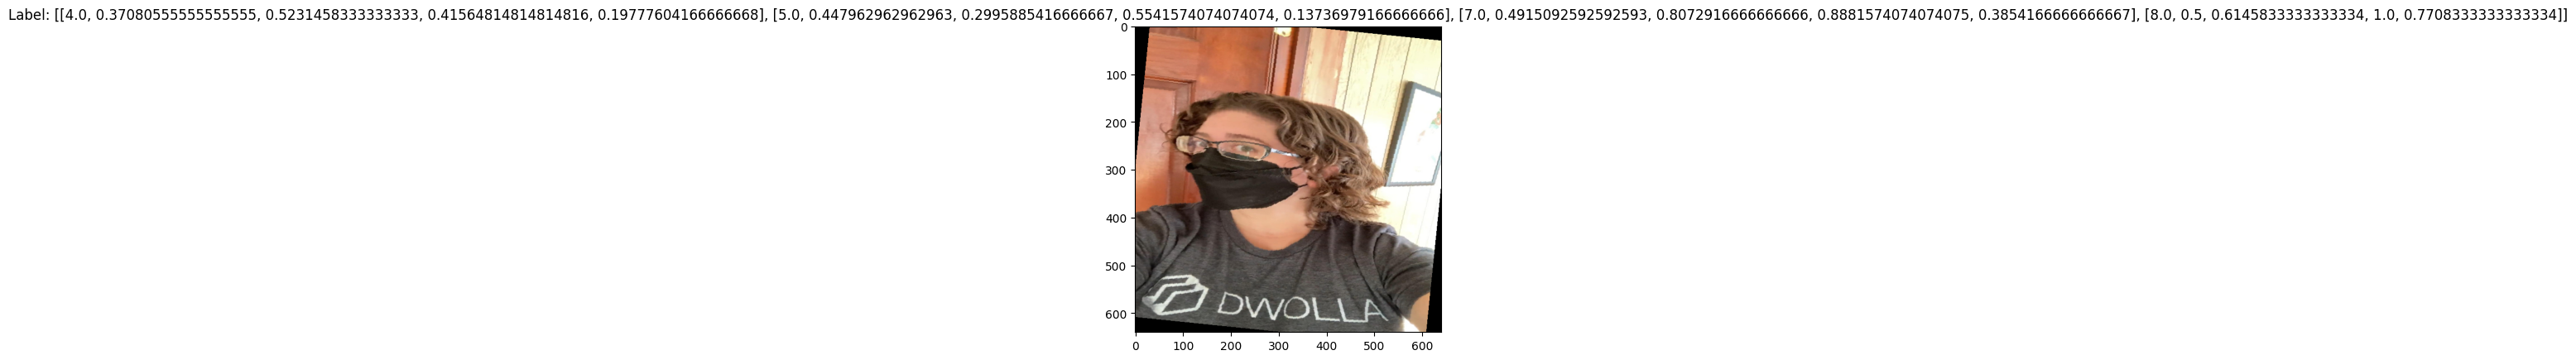

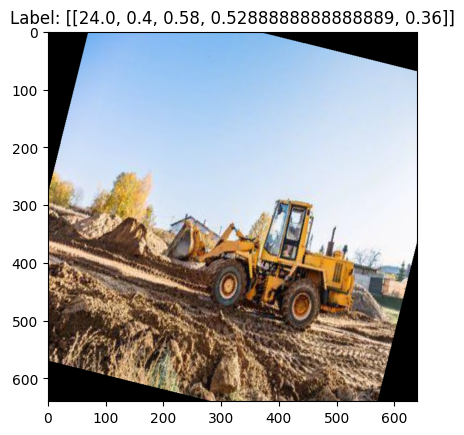

In [88]:
data_loader = train_dataloader

data_iter = iter(data_loader)
images, labels = next(data_iter)

#  images = images.gpu()
images = images.cpu()
labels = labels

# images format (batch_size, channels, height, width)
batch_size = images.size(0)
for i in range(batch_size):
    image = np.transpose(images[i].numpy(), (1, 2, 0))  # images are in CHW format
    label = labels[i]

    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.show()

<ipython-input-98-df134eb13a68>:34: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


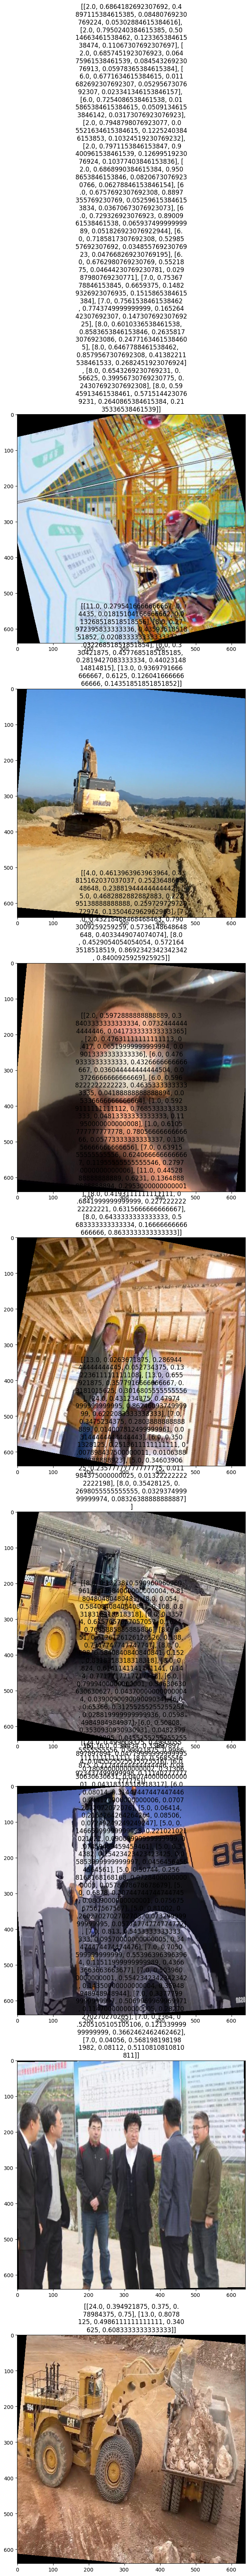

In [98]:
data_loader = train_dataloader

data_iter = iter(data_loader)
images, labels = next(data_iter)

images = images.cpu()
labels = labels

batch_size = images.size(0)

# Set a fixed size for image display
fig, axs = plt.subplots(nrows=batch_size, figsize=(75,75))

for i in range(batch_size):
    image = np.transpose(images[i].numpy(), (1, 2, 0))  # images are in CHW format
    label = str(labels[i])

    axs[i].imshow(image)

    # Displaying long labels with line breaks
    axs[i].set_title('\n'.join([label[j:j+30] for j in range(0, len(label), 30)]))

plt.tight_layout()
plt.show()


In [82]:
for i in enumerate(train_dataloader):
  print(i)  # shape (batch_size, channels, height, width)
  break

(0, (tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
   

In [83]:
for i in train_dataloader:
  print(i)
  break


(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
       

In [84]:
for images, labels in train_dataloader:
  print(images,labels)
  print(type(images),type(labels))
  break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

In [ ]:
#  opt = parser.parse_args()   this is from export.py